In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import time
import numpy as np
from datetime import datetime
import yfinance as yf
import os
import glob
import regex as re
import csv
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def remove_none_types(mydf):
    if mydf.isnull().values.any():
        return False
    else:
        return True

X_data = []
Y_data = []

sectors = ["banks"]
for sector in sectors:
    filelist = os.listdir("sectors/"+sector)
    try:
        filelist.remove('.DS_Store')
    except:
        pass

    for stock in filelist:
        sector_files = glob.glob('sectors/'+str(sector)+'/'+str(stock)+'/'+str(stock)+'20*[0-9]**[0-9]*[1-4].*')
        sector_files.sort(reverse=True)

        testpath = sector_files[0]
        testdata_from_csv = pd.read_csv(testpath)
        try:
            market_cap = float(testdata_from_csv.iloc[[-1]].values[0][0])
            if (market_cap > 500000000) and (market_cap < 9000000000):
                number_to_loop = len(sector_files)
                if number_to_loop%3 != 0:
                    number_to_loop = number_to_loop-(number_to_loop%3) #gets nearest (inclusive) multiples of 3
                for i in range(0, number_to_loop+2, 3): # for every .csv path of that stock
                    path = sector_files[i]
                    path2 = sector_files[i+1]
                    path3 = sector_files[i+2]
                    data_from_csv = pd.read_csv(path)
                    data_from_csv2 = pd.read_csv(path2)
                    data_from_csv3 = pd.read_csv(path3)
                    Checks_None = remove_none_types(data_from_csv)
                    Checks_None2 = remove_none_types(data_from_csv2)
                    Checks_None3 = remove_none_types(data_from_csv3)
                    if (Checks_None == True) and (Checks_None2 == True) and (Checks_None3 == True):
                        single_X_data = (np.array((data_from_csv[3:85].astype(float))).flatten()) 
                        single_X_data2 = (np.array((data_from_csv2[3:85].astype(float))).flatten()) 
                        single_X_data3 = (np.array((data_from_csv3[3:85].astype(float))).flatten()) 
                        if ((single_X_data.shape[0]) == 82) and ((single_X_data2.shape[0]) == 82) and ((single_X_data3.shape[0]) == 82):
                            X_data.append(single_X_data)
                            X_data.append(single_X_data2)
                            X_data.append(single_X_data3)
                            single_Y_data = np.array(data_from_csv[85:95].astype(float)).flatten()
                            Y_data.append(single_Y_data)
        except:
            pass


                

#[
#   [#AAPL
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ],
#   [#MSFT
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ]
#
# ]



ORI_X_data = np.array(X_data)

ORI_Y_data = np.array(Y_data)
# ORI_Y_data = ORI_Y_data[:,:5]



In [402]:
def remove_none_types(mydf):
    if mydf.isnull().values.any():
        return False
    else:
        return True

X_data = []
Y_data = []

sectors = ["automobiles", "banks"]
for sector in sectors:
    filelist = os.listdir("sectors/"+sector)
    try:
        filelist.remove('.DS_Store')
    except:
        pass

    for stock in filelist:
        sector_files = glob.glob('sectors/'+str(sector)+'/'+str(stock)+'/'+str(stock)+'20*[0-9]**[0-9]*[1-4].*')
        sector_files.sort(reverse=True)

        testpath = sector_files[0]
        testdata_from_csv = pd.read_csv(testpath)
        try:
            market_cap = float(testdata_from_csv.iloc[[-1]].values[0][0])
            if (market_cap > 2500000000):
                number_to_loop = len(sector_files)
                if number_to_loop%2 != 0:
                    number_to_loop = number_to_loop-(number_to_loop%2) 
                for i in range(0, number_to_loop+1, 2): # for every .csv path of that stock
                    path = sector_files[i]
                    path2 = sector_files[i+1]
                    data_from_csv = pd.read_csv(path)
                    data_from_csv2 = pd.read_csv(path2)
                    Checks_None = remove_none_types(data_from_csv)
                    Checks_None2 = remove_none_types(data_from_csv2)
                    if (Checks_None == True) and (Checks_None2 == True):
                        single_X_data = (np.array((data_from_csv[3:85].astype(float))).flatten()) 
                        single_X_data2 = (np.array((data_from_csv2[3:85].astype(float))).flatten()) 
                        if ((single_X_data.shape[0]) == 82) and ((single_X_data2.shape[0]) == 82):
                            X_data.append(single_X_data)
                            X_data.append(single_X_data2)
                            single_Y_data = np.array(data_from_csv[85:95].astype(float)).flatten()
                            Y_data.append(single_Y_data)
        except:
            pass


                

#[
#   [#AAPL
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ],
#   [#MSFT
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ]
#
# ]



ORI_X_data = np.array(X_data)

ORI_Y_data = np.array(Y_data)
# ORI_Y_data = ORI_Y_data[:,:5]



In [7]:
Y_data = ORI_Y_data[:,4]

In [4]:
scaler = StandardScaler()
X_data = scaler.fit_transform(ORI_X_data)
X_data

array([[-0.03821565,  0.90544074,  0.98479369, ..., -0.75889972,
        -1.05906695, -0.92041027],
       [-0.01536021,  0.40173081,  0.59260923, ..., -1.64612968,
        -0.68401847,  0.06215993],
       [-0.02704105,  0.27580152,  0.52550709, ..., -1.81135205,
        -1.51720377, -1.69447181],
       ...,
       [-0.04163594,  0.18643768,  0.10654288, ...,  0.11551021,
         1.3935658 , -0.15897426],
       [-0.04672316, -0.30108854, -0.14901344, ...,  0.9926764 ,
         0.10363858,  0.70707676],
       [-0.04889634, -0.03005597, -0.08524069, ...,  0.50437696,
         1.03603105,  1.42544135]])

In [6]:
X_data = X_data.reshape(-1,3,82)

In [405]:
Y_data = ORI_Y_data.reshape(-1,10)
Y_data

array([[ 0.18715475,  0.11144807, -0.00389906, ..., -0.02821215,
         0.05969993,  0.16895602],
       [-0.11340496,  0.01913649, -0.14375942, ..., -0.13056379,
        -0.16138605,  0.00708335],
       [-0.05403898, -0.07270197, -0.09632308, ..., -0.09712789,
        -0.09952134, -0.23015699],
       ...,
       [-0.00617315, -0.08518536, -0.06234558, ..., -0.05885983,
        -0.0353149 , -0.03159522],
       [-0.01187166,  0.02513978,  0.07541254, ...,  0.06573774,
         0.08858994,  0.1626862 ],
       [ 0.03610385,  0.12594449,  0.11670488, ...,  0.14556033,
         0.08694622,  0.20072595]])

In [406]:
Y_data = Y_data[:,:5]
Y_data

array([[ 0.18715475,  0.11144807, -0.00389906,  0.08621249,  0.19820205],
       [-0.11340496,  0.01913649, -0.14375942, -0.17411388, -0.00820138],
       [-0.05403898, -0.07270197, -0.09632308, -0.09871867, -0.22947077],
       ...,
       [-0.00617315, -0.08518536, -0.06234558, -0.03888833, -0.03518208],
       [-0.01187166,  0.02513978,  0.07541254,  0.09847234,  0.17324115],
       [ 0.03610385,  0.12594449,  0.11670488,  0.05956698,  0.17048147]])

In [407]:
X_data[0:2]

array([[[ 2.07821252e-02,  1.61762317e+00,  1.20885089e+00,
         -9.92268067e-01, -1.48926241e+00, -4.86961573e-01,
         -4.52389395e-01,  3.03590607e-01, -1.05985544e+00,
          2.30003415e-02, -6.60576454e-01, -6.68279569e-01,
         -7.80921834e-01,  1.90425233e+00,  1.47399941e+00,
         -1.12835957e+00, -2.37498386e+00,  4.44733023e-01,
         -4.24002519e-01, -1.05379324e+00, -3.55161191e-01,
          1.48361330e+00,  4.81234243e-01, -1.10231914e+00,
          8.99417496e-02,  1.89582196e+00,  9.47575349e-01,
          9.41940112e-01,  9.58974304e-01, -1.99453142e-01,
         -1.11805474e+00, -1.09105361e-01, -6.00639755e-01,
         -8.48948161e-01, -9.70380907e-01, -1.21633510e+00,
          6.48630778e-01,  1.21405470e+00,  1.34036232e+00,
         -1.75534435e-01, -4.62171523e-01, -9.36652853e-02,
          9.55918859e-01,  1.03035384e+00,  1.07780235e+00,
         -2.92577426e-01,  6.47930307e-01,  5.09200329e-01,
         -5.68370987e-01, -6.58778738e-0

In [11]:
X_data.shape

(553, 3, 82)

In [12]:
Y_data.shape

(553,)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=65)
Y_train.shape

(370,)

In [296]:
# model2 = model

In [36]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, TimeDistributed
from keras.optimizers import Adam
from keras.optimizers import SGD

# Generate toy data for demonstration purposes
timesteps = 3
input_dim = 82

model = Sequential()
model.add(LSTM(82, input_shape=(timesteps,input_dim), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
optimizer = SGD(lr=0.01, momentum=0.9)

model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mse'])

# Train the model
model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.33)


Epoch 1/40


2023-02-09 09:37:54.042536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:54.342307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:54.518283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:54.754132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:54.933652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.4913 - mse: 0.2711

2023-02-09 09:37:56.032472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:56.141320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:37:56.226193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 4s 196ms/step - loss: 0.4913 - mse: 0.2711 - val_loss: 0.4940 - val_mse: 0.2686
Epoch 2/40
8/8 [==============================] - 0s 44ms/step - loss: 0.4530 - mse: 0.2343 - val_loss: 0.4396 - val_mse: 0.2178
Epoch 3/40
8/8 [==============================] - 0s 38ms/step - loss: 0.3959 - mse: 0.1848 - val_loss: 0.3778 - val_mse: 0.1673
Epoch 4/40
8/8 [==============================] - 0s 27ms/step - loss: 0.3387 - mse: 0.1424 - val_loss: 0.3191 - val_mse: 0.1263
Epoch 5/40
8/8 [==============================] - 0s 31ms/step - loss: 0.2870 - mse: 0.1077 - val_loss: 0.2685 - val_mse: 0.0963
Epoch 6/40
8/8 [==============================] - 0s 29ms/step - loss: 0.2498 - mse: 0.0854 - val_loss: 0.2271 - val_mse: 0.0752
Epoch 7/40
8/8 [==============================] - 0s 27ms/step - loss: 0.2167 - mse: 0.0687 - val_loss: 0.1978 - val_mse: 0.0614
Epoch 8/40
8/8 [==============================] - 0s 24ms/step - loss: 0.1949 - mse: 0.0595 - val_loss: 0.1

2023-02-09 09:38:08.925182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-09 09:38:09.044931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/6 [====>.........................] - ETA: 3s

2023-02-09 09:38:09.150999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 36ms/step
MSE: 0.03
R2: -0.06


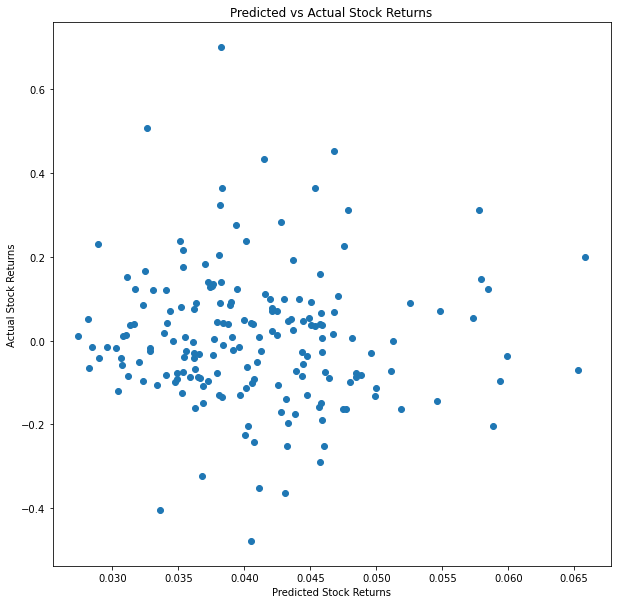

In [37]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [381]:
Y_pred[0:5]

array([[0.1758499 , 0.1115374 , 0.11806431, 0.35915485, 0.23539351],
       [0.14748642, 0.32831475, 0.3417308 , 0.0678051 , 0.114663  ],
       [0.17585044, 0.11153541, 0.11806197, 0.35916072, 0.23539153],
       [0.1758501 , 0.11153518, 0.11806197, 0.35916072, 0.23539197],
       [0.17584987, 0.11153525, 0.11806183, 0.35916096, 0.23539214]],
      dtype=float32)

In [382]:
Y_test[0:5]

array([[-0.08045977, -0.13218381, -0.09578568, -0.13601514, -0.58045981],
       [-0.03092562, -0.00497413, -0.0341696 , -0.020545  , -0.00700478],
       [-0.0061308 , -0.01426791, -0.08781975, -0.07338441, -0.05344972],
       [ 0.06046141,  0.05724236,  0.05042499, -0.08421559, -0.08364814],
       [-0.03031538,  0.02369234,  0.11084151,  0.09242959,  0.06174332]])